## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [03] : [Principal Components Analysis] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [82]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Fernando Khorasani"
myNIM = "43088"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Fernando Khorasani
NIM: 		43088
Start: 		2022-09-26 14:17:29.622363
Device ID: 	47f28192-3d6b-11ed-9797-5405db3707d4



---

### Dataset yang dipakai:

1. Ecoli UCI Dataset – sumber : https://www.kaggle.com/datasets/kannanaikkal/ecoli-uci-dataset
2. [Nama dataset2] – sumber : [cantumkan link dataset]

### Hasil kerja

In [71]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

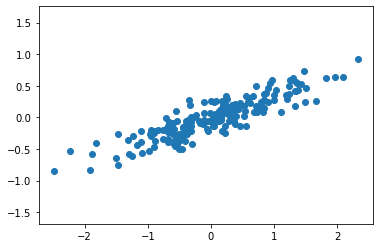

In [72]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal');

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [74]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


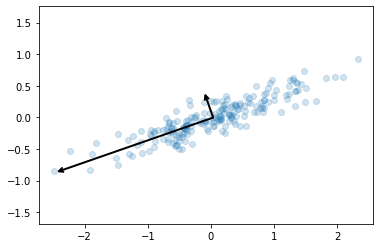

In [75]:
def draw_vector(v0,v1, ax=None):
    ax = ax or plt.gca()
    arrowprops= dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)

# plot data
plt.scatter(X[:,0],X[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [76]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']
(820, 62, 47)


In [77]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

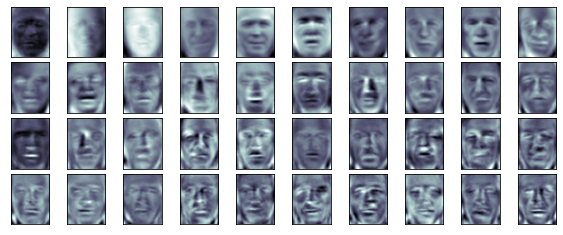

In [78]:
def plot_faces(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62,47), cmap='bone')

plot_faces(pca.components_[:40])

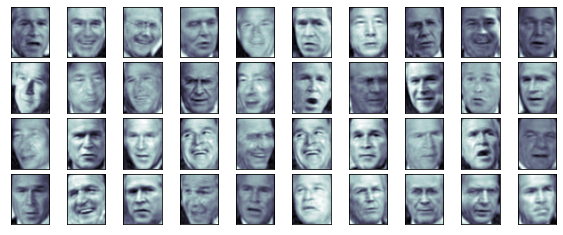

In [79]:
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
plot_faces(projected)

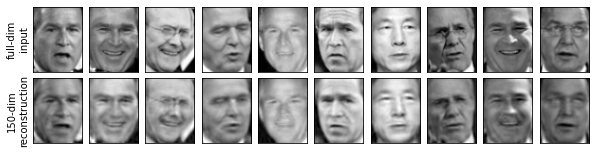

In [80]:
fig, axes = plt.subplots(2, 10, figsize=(10, 2.5),
                          subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    axes[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    axes[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

axes[0, 0].set_ylabel('full-dim\ninput')
axes[1, 0].set_ylabel('150-dim\nreconstruction');

In [8]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

In [37]:
data = pd.read_csv('ecoli.csv', header=None)
data = csv_data[[5, 7]]
data

,5,7
0,0.56,0.35
1,0.54,0.44
2,0.49,0.46
3,0.52,0.36
4,0.55,0.35
...,...,...
331,0.47,0.30
332,0.48,0.32
333,0.44,0.38
334,0.42,0.37


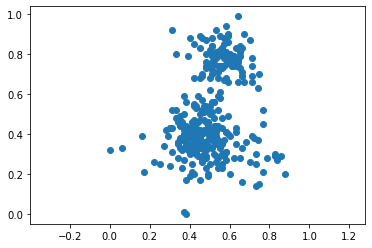

In [46]:
plt.scatter(data[[5]], data[[7]])
plt.axis('equal');

In [47]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [48]:
print("components: \n", pca.components_)
print("explained variance: ", pca.explained_variance_)

components: 
 [[-0.20923319 -0.97786577]
 [-0.97786577  0.20923319]]
explained variance:  [0.04523826 0.01359032]


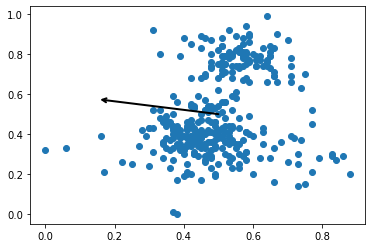

In [49]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(csv_data[[5]], csv_data[[7]])

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis();

In [63]:
pca = PCA(n_components=1)
pca.fit(data)
csv_data_pca = pca.transform(data)
print("Original shape: ", data.shape)
print("Transformed shape:", csv_data_pca.shape)

Original shape:  (336, 2)
Transformed shape: (336, 1)


(336, 2)


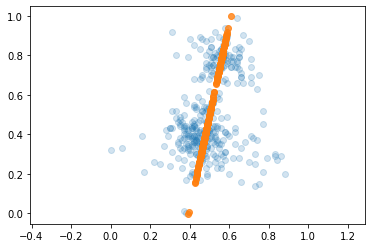

In [64]:
csv_data_new = pca.inverse_transform(csv_data_pca)
print(csv_data_new.shape)
plt.scatter(data[[5]], data[[7]], alpha=0.2)
plt.scatter(csv_data_new[:, 0], csv_data_new[:, 1], alpha=0.8)
plt.axis('equal');

In [65]:
digits = load_digits()
digits.data.shape

(1797, 64)

Text(0, 0.5, 'cumulative explained variance')

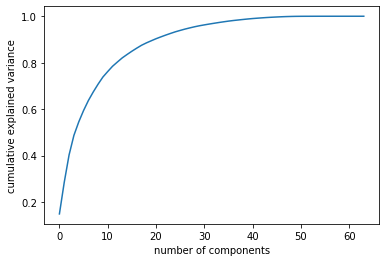

In [66]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

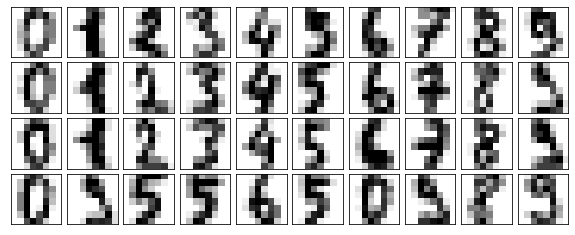

In [67]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

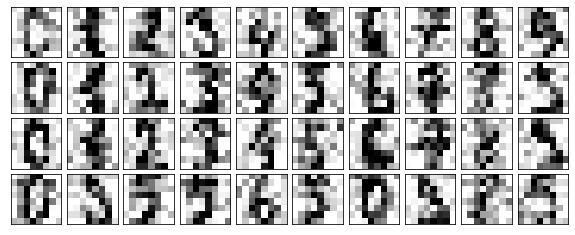

In [68]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [69]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

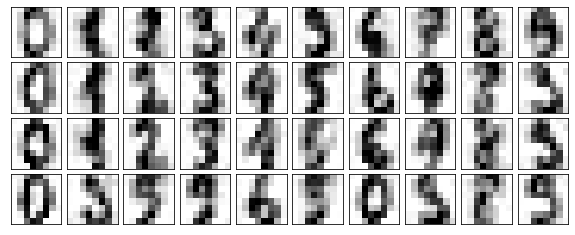

In [70]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Pada implementasi PCA itu untuk melakukan reduksi atau mengurangi dimensi. dari dataset yang saya miliki yang awalnya memiliki 2 dimensi, saya reduksi menjadi 1 dimensi. Kemudian masing-masing diplot dan terlihat perbedaannya yang sangat terlihat.
    - Pada implementasi ke2, yaitu Noise filtering, awalnya terdapat angka 0-9 sebanyak 4 baris. Kemudia plot itu diberi noise, sehingga angka-angka itu terganggu dan menjadi tidak jelas. Lalu diberi filter, sehingga angka-angka itu menjadi lebih jelas.
    - Hasil perbandingan akurasi antara algoritma (jika ada dalam modul)
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

In [83]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Fernando Khorasani
NIM: 	43088
Time-stamp:	2022-09-26 14:17:34.811701


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [84]:
!jupyter nbconvert --to html "./FernandoKhorasani_Week3_IF540.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./FernandoKhorasani_Week3_IF540.ipynb to html
[NbConvertApp] Writing 1226167 bytes to FernandoKhorasani_Week3_IF540.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#